# Week5 (Wuwei Zhang)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST
import math
from sklearn.model_selection import train_test_split

def load_dataset():
    mndata = MNIST('C:/Users/Zhang/python-mnist/data')
    A_train, labels_train = map(np.array, mndata.load_training()) 
    A_test, labels_test = map(np.array, mndata.load_testing()) 
    A_train = A_train/255.0
    A_test = A_test/255.0
    
    return A_train, A_test, labels_train, labels_test

A_train, A_test, labels_train, labels_test = load_dataset()


B_labels_train = np.zeros((60000, 10))
for i in range(len(labels_train)):
    B_labels_train[i, labels_train[i]] = 1
B_labels_test = np.zeros((10000, 10))
for j in range(len(labels_test)):
    B_labels_test[j, labels_test[j]] = 1

## Use non-linear transformation, and then Solve X using ridge regression by hand
* We will use the feature transform $h(x) = cos(G@A.T + y)$ to transform the features from 784 feature space to p space where $G \in \mathbb{R}^{p \times d}$, $y \in \mathbb{R}^p$ and the cosine function is applied elementwise.
* Let $G$ be a random matrix with each entry sampled i.i.d from a Guassian with $\mu = 0$ and variance $\sigma^1 = 0.1$ (np.random.normal) and $b$ be a random vector sampled i.i.d from the uniform distribution on $[0, 2 \pi]$ (np.random.uniform)
* choose p using cross-validation: 80/20 training + validation
* solve solution X using $\widehat{X} = (A^TA + \lambda I)^{-1} A^TB$ where A here should be the matrix after transformation 

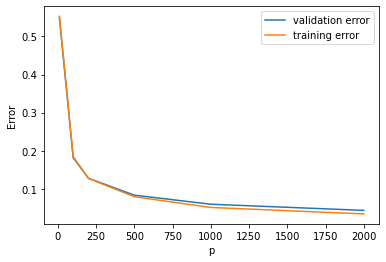

In [2]:
p = [10, 100, 200, 500, 1000, 2000]


lam = 1e-4
training_error = np.zeros(6)
validation_error = np.zeros(6)

for i in range(len(p)):
    G = np.random.normal(0, 0.1, (p[i], 784))
    y = np.random.uniform(0, 2 * math.pi, (p[i], 1))
    Transform = np.cos(G@A_train.T + y).T
    
    x_train, x_vali, y_train, y_vali = train_test_split(Transform, B_labels_train,
                                                        test_size = 0.2)
    labels_training = np.argmax(y_train, axis = 1)
    labels_validation = np.argmax(y_vali, axis = 1)
    
    # Fit the ridge model using training set   
    inverse = np.linalg.pinv(x_train.T@x_train + lam*np.identity(p[i]))
    # Compute solution X by hand
    my_X = inverse@x_train.T@y_train 
    y_train_predicted = np.matmul(x_train, my_X)
    y_vali_predicted = np.matmul(x_vali, my_X)
    labels_train_predicted = np.argmax(y_train_predicted, axis = 1)
    labels_vali_predicted = np.argmax(y_vali_predicted, axis = 1)
    training_error[i] = np.count_nonzero(labels_training - 
                                         labels_train_predicted)/48000
    validation_error[i] = np.count_nonzero(labels_validation - 
                                           labels_vali_predicted)/12000
    

plt.plot(p, validation_error, label="validation error")
plt.plot(p, training_error, label = "training error")
plt.xlabel('p')
plt.ylabel('Error')
plt.legend()
plt.show()

In [3]:
print("training error: ", training_error)
print("validation error: ", validation_error)

training error:  [0.55308333 0.184625   0.1271875  0.07902083 0.05097917 0.03397917]
validation error:  [0.54891667 0.18183333 0.12758333 0.08316667 0.05941667 0.04325   ]
